In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

## 1 - Load Data

In [2]:
train_data = pd.read_csv('train.tsv', sep='\t', header=0)
test_data  = pd.read_csv('test.tsv' , sep='\t', header=0)

sentiments_data = train_data['Sentiment'].values
phrase_test  = test_data ['Phrase'].values

## 2 - Understand Data Distribution 

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

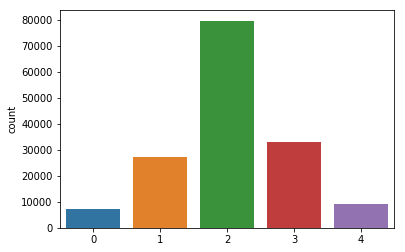

In [3]:
graph = sns.countplot(sentiments_data)

train_data ['Sentiment'].value_counts()

## 2 - Most Informative Word

In [4]:

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import pandas as pd
import numpy as np
import csv as csv
from nltk.tokenize import word_tokenize

In [5]:
train_data = pd.read_csv('train.tsv', sep='\t', header=0)

movie_data = []
for index, row in train_data.iterrows():
    if row['Sentiment'] < 2:
        tup = (row['Phrase'] ,'neg')
    elif row['Sentiment'] > 2:
        tup = (row['Phrase'] ,'pos')
    movie_data.append(tup)

In [6]:
words_train_data = [({word: 'true' for word in word_tokenize(x[0])}, x[1]) for x in movie_data]

In [7]:
classifier = NaiveBayesClassifier.train(words_train_data)
classifier.show_most_informative_features(100)

Most Informative Features
                   worse = 'true'            neg : pos    =    114.2 : 1.0
                    bore = 'true'            neg : pos    =     95.3 : 1.0
                  devoid = 'true'            neg : pos    =     93.7 : 1.0
                    ugly = 'true'            neg : pos    =     84.0 : 1.0
               wonderful = 'true'            pos : neg    =     76.4 : 1.0
                 shallow = 'true'            neg : pos    =     71.1 : 1.0
               obnoxious = 'true'            neg : pos    =     69.8 : 1.0
                 rip-off = 'true'            neg : pos    =     69.8 : 1.0
                   banal = 'true'            neg : pos    =     67.4 : 1.0
                shooting = 'true'            neg : pos    =     66.6 : 1.0
                   treat = 'true'            pos : neg    =     66.0 : 1.0
                     wry = 'true'            pos : neg    =     58.2 : 1.0
                 dullest = 'true'            neg : pos    =     57.8 : 1.0

## First Top 10 Postive Reviews

In [8]:
i = 0
for index, row in train_data.iterrows():
    if i > 10:
        break
    if row['Sentiment'] == 4 :
        print row['Phrase']
        i += 1

This quiet , introspective and entertaining independent is worth seeking .
quiet , introspective and entertaining independent
entertaining
is worth seeking
A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera
A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder
thrilling
A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .
nearly epic
rooted in a sincere performance by the title character undergoing midlife crisis .
in a sincere performance


## First Top 10 Negtive Reviews

In [9]:
i = 0
for index, row in train_data.iterrows():
    if i > 10:
        break
    if row['Sentiment'] == 1:
        print row['Phrase']
        i += 1

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
the gander , some of which occasionally amuses but none of which amounts to much of a story
but none of which amounts to much of a story
none of which amounts to much of a story
Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .
, I suspect , would have a hard time sitting through this one .
would have a hard time sitting through this one .
a hard time sitting through this one
a hard time
hard time
sitting through this one
